<a href="https://colab.research.google.com/github/jose-ns/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/jose-ns/TelecomX_LATAM/refs/heads/main/TelecomX_Data.json'
datos_clientes = pd.read_json(url)

In [3]:
datos_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

### Revisamos las columnas del df

In [4]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
datos_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


### Trabajando con una copia de los datos originales

In [6]:
# Copia del df original
df = datos_clientes.copy()

### Trasnformar las columnas que presentan diccionarios

In [7]:
# Columnas con diccionarios
cols_diccionario =  ['customer', 'phone', 'internet', 'account']
for col in cols_diccionario:
    # Extraer cada clave del diccionario como una columna nueva
    expandida = df[col].apply(pd.Series)

    # Modificando el nombre de las columnas
    expandida.columns = [f"{col}_{subcol}" for subcol in expandida.columns]

    # Concatenar al df original y eliminar la columna original
    df = pd.concat([df.drop(columns=[col]), expandida], axis=1)

In [8]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


###  Limpiar y separar account_Charges

In [9]:
# Crear una nueva columna con el cargo mensual
df['Monthly_Charge'] = df['account_Charges'].apply(lambda x: x['Monthly'])

# Crear una nueva columna con el cargo total, convirtiendo a número solo si el valor no está vacío
df['Total_Charge'] = df['account_Charges'].apply(
    lambda x: float(x['Total']) if x['Total'].strip() != '' else np.nan)

In [10]:
# Eliminar la columna original que contenía los diccionarios como strings
df.drop('account_Charges', axis=1, inplace=True)

### Limpiar 'Churn'

In [11]:
# Reemplazar cadenas vacías '' por NaN
df['Churn'] = df['Churn'].replace('', np.nan)

# Limpiar espacios y normalizar mayúsculas/minúsculas
df['Churn'] = df['Churn'].str.strip().str.capitalize()

# Manejo de valores faltantes en 'Churn' eliminar filas con NaN
df = df.dropna(subset=['Churn'])

### Limpiar columnas con servicios

In [12]:
# Normalizar valores 'no servicio' a 'No' en otras columnas
cols_con_servicio = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies']

for col in cols_con_servicio:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

In [17]:
df['internet_StreamingMovies'].unique()

array([0, 1])

### Estandarización y transformación de datos

In [13]:
# Convertir columnas binarias de 'Yes'/'No' a 1/0
cols_binarias = [
    'Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_PaperlessBilling']

for col in cols_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Verificar valores faltantes después del procesamiento
print('Valores faltantes por columna:')
print(df[cols_binarias].isna().sum())

Valores faltantes por columna:
Churn                        0
customer_Partner             0
customer_Dependents          0
phone_PhoneService           0
phone_MultipleLines          0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_PaperlessBilling     0
dtype: int64


### Columna de cuentas diarias

In [14]:
# Crear la columna 'Cuentas_Diarias' dividiendo la facturación mensual entre 30
df['Cuentas_Diarias'] = df['Monthly_Charge'] / 30

In [15]:
df.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Monthly_Charge,Total_Charge,Cuentas_Diarias
2932,4077-HWUYD,0,Male,0,1,1,72,1,1,DSL,...,1,1,1,1,Two year,1,Bank transfer (automatic),87.55,6463.15,2.918333
6925,9541-PWTWO,0,Female,0,0,0,52,1,1,DSL,...,1,1,1,1,Two year,1,Bank transfer (automatic),80.95,4233.95,2.698333
4391,6016-LVTJQ,0,Female,0,1,1,34,1,0,No,...,0,0,0,0,Month-to-month,0,Mailed check,20.65,716.40,0.688333
2897,4013-TLDHQ,1,Male,0,0,0,19,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,78.25,1490.95,2.608333
1668,2368-GAKKQ,0,Female,0,0,0,70,1,1,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),113.65,7939.25,3.788333


#📊 Carga y análisis

 Realizar un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [16]:
df.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,Monthly_Charge,Total_Charge,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


###comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.

####Gráfico de barras (conteo de clientes)

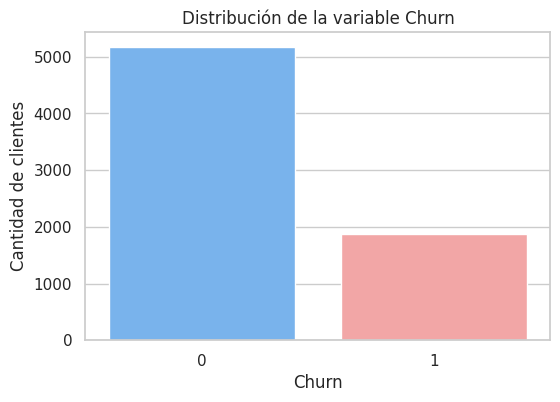

In [18]:
custom_palette = ['#66b3ff','#ff9999']
sns.set(style='whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Churn', palette=custom_palette, legend=False)
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

#### Gráfico de pastel (porcentaje de clientes)

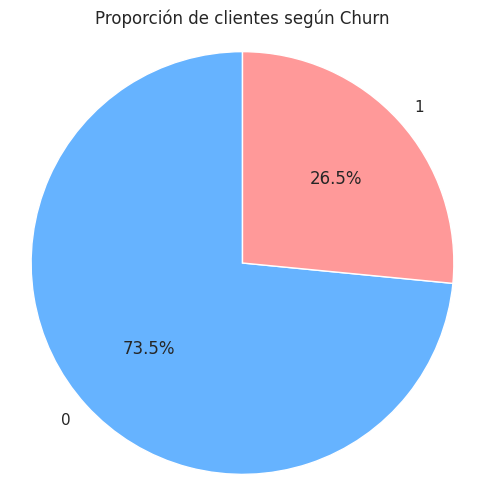

In [19]:
# Calcular los valores
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Crear gráfico
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Proporción de clientes según Churn')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

###Recuento de evasión por variables categóricas

In [20]:
#  Función para graficar variables categóricas vs Churn
def plot_churn_by_category(df, column):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=column, hue='Churn', palette=custom_palette)
    plt.title(f'Churn vs {column}')
    plt.xlabel(column)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

In [21]:
# Seleccionamos variables clave para explorar:
variables_categoricas = [
    'customer_gender',
    'account_Contract',
    'account_PaymentMethod',
    'internet_InternetService',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents'
]

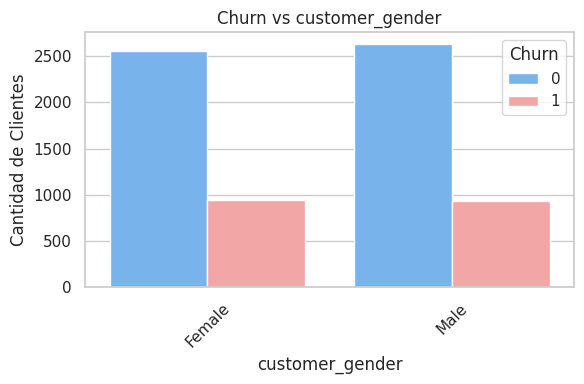

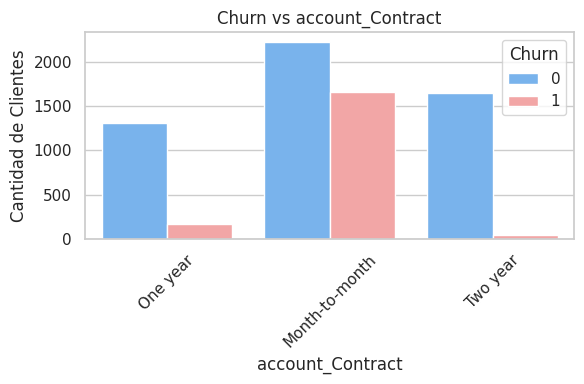

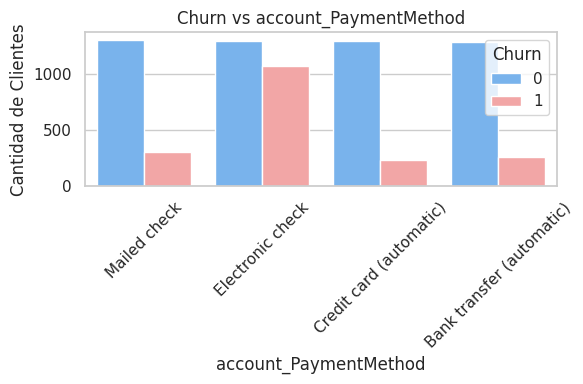

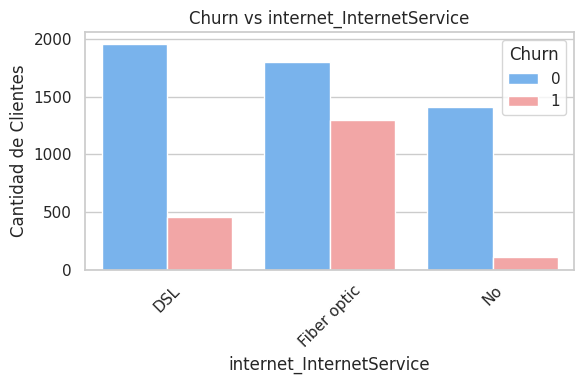

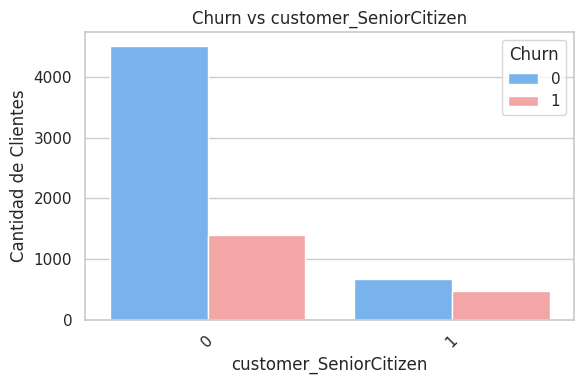

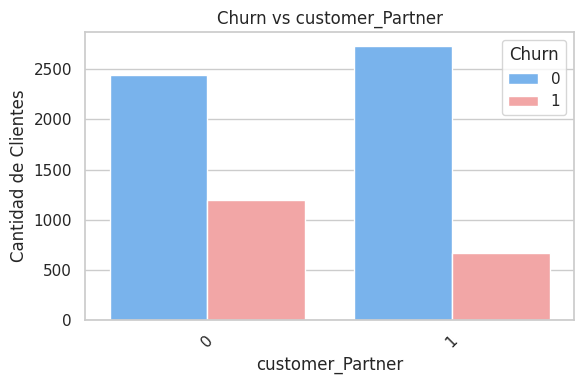

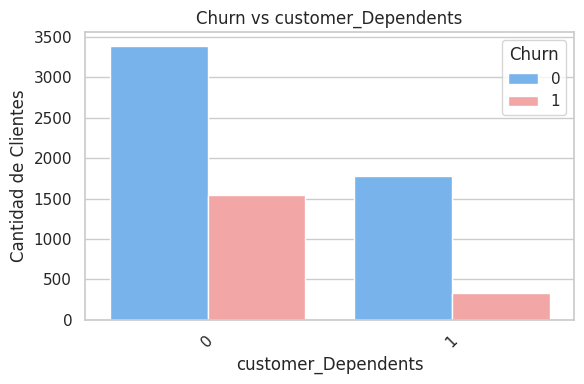

In [22]:
# Ejecutar los gráficos
for col in variables_categoricas:
    plot_churn_by_category(df, col)

#### Conteo de evasión por variables numéricas

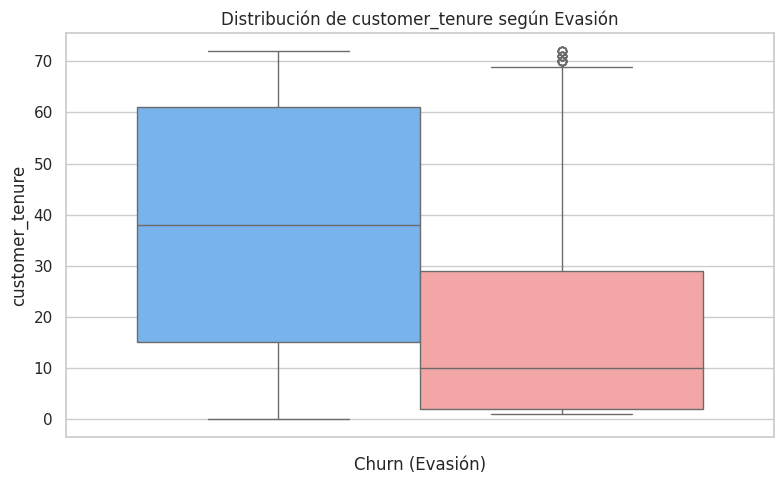

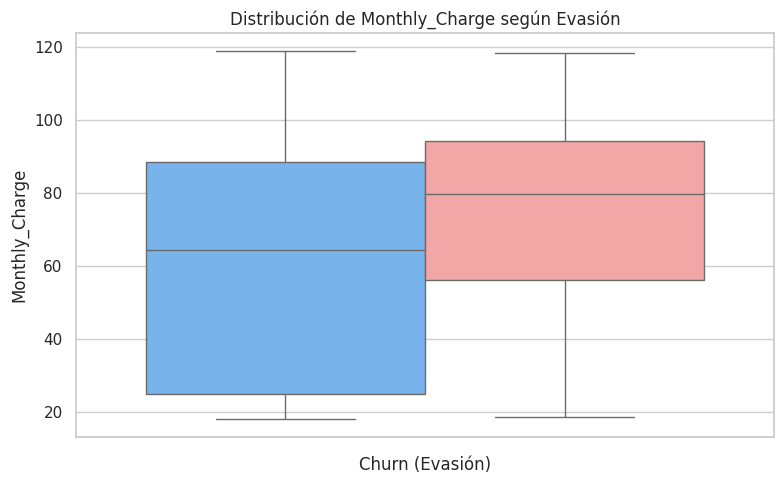

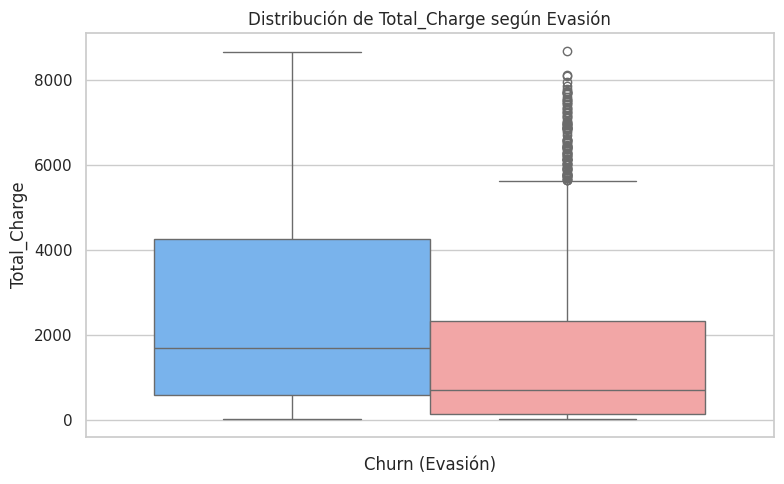

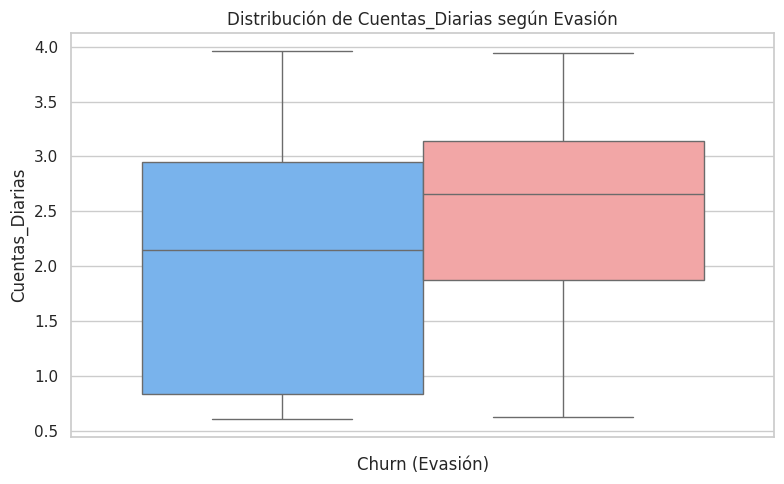

In [23]:
# Variables numéricas relevantes
variables_numericas = ['customer_tenure', 'Monthly_Charge', 'Total_Charge', 'Cuentas_Diarias']

# Gráfico para cada variable numérica
for col in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=col, hue='Churn', data=df, palette=custom_palette, legend=False)
    plt.title(f'Distribución de {col} según Evasión')
    plt.xlabel('Churn (Evasión)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

#📄Informe final - Análisis de Evasión de Clientes (Churn)


### Introducción
El objetivo de este análisis es entender por qué algunos clientes deciden dejar el servicio (churn) y qué factores están relacionados con esa decisión. Identificar estos patrones puede ayudar a la empresa a tomar acciones para reducir la evasión y mejorar la retención.

### Limpieza y Tratamiento de Datos

Para preparar los datos, se hicieron estos pasos:

  * Importación y exploración inicial del dataset.

  * Revisión de valores nulos y tipos de datos. Se corrigieron errores y se convirtieron columnas a formatos más adecuados (por ejemplo, cargos totales que estaban como texto).

  * Eliminación de columnas innecesarias como identificadores o duplicados.

  * Transformación de variables categóricas y booleanas para facilitar el análisis (por ejemplo, convertir ‘Yes/No’ en 1/0).

  * Se evitó la creación de columnas duplicadas o irrelevantes para mantener el dataset limpio y claro.



### Análisis Exploratorio de Datos (EDA)
Se hizo un recorrido visual y estadístico para detectar relaciones entre el churn y otras variables.

  * Distribución general de churn
    - Se observó cuántos clientes permanecen y cuántos abandonan.

    - El churn representa una parte significativa del total, lo que justifica la necesidad de este análisis.

  * Variables categóricas vs churn
    - Se analizaron variables como el tipo de contrato, método de pago, servicios contratados y perfil del cliente (pareja, dependientes, etc.).

    - Los contratos mensuales y el pago electrónico están más asociados a clientes que se van.

  * Variables numéricas vs churn
    - Se usaron boxplots para comparar variables como MonthlyCharges, TotalCharges y tenure.

    - Clientes con gastos mensuales más altos o con poca antigüedad tienen mayor tendencia a dejar el servicio.

### Conclusiones e Insights
  * Antigüedad (tenure): cuanto más tiempo lleva el cliente, menos probable es que se vaya.

  * Gastos mensuales altos: están asociados a una mayor tasa de churn.

  * Contratos mensuales = más churn. Contratos largos ayudan a retener.

  * Clientes sin pareja o sin dependientes muestran mayor evasión.

  * Métodos de pago automáticos (electronic check) también aparecen más en clientes que cancelan.

### Recomendaciones
  * 🔧 Incentivar contratos de largo plazo con descuentos o beneficios exclusivos.

  * 👁️‍🗨️ Monitorear a clientes nuevos y con alto gasto mensual, ya que están más en riesgo.

  * 🤝 Diseñar beneficios familiares o grupales para clientes solos o sin dependientes.

  * 📊 Desarrollar un sistema de alerta temprana que detecte perfiles con alta probabilidad de churn.

  * 💬 Explorar encuestas o feedback directo para entender mejor los motivos detrás del abandono.